### What is TF-IDF?

- TF stands for **Term Frequency** and denotes the ratio of  number of times a particular word appeared in a Document to total number of words in the document.
          
         Term Frequency(TF) = [number of times word appeared / total no of words in a document]
 
- Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.


- IDF stands for **Inverse Document Frequency** and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

         Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
        
- In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0. 


- Finally:
         
         TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "India have won the ODI World Cup two times.",
    "Apple is announcing new iphone 16 series",
    "Lava is announcing new blaze-x tomorrow",
    "Google is announcing new pixel-9 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Redmi is announcing new 13-pro series tomorrow",
    "I am eating popcorn while watching worl cup."
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [3]:
#let's print the vocabulary

print(v.vocabulary_)

{'india': 10, 'have': 9, 'won': 29, 'the': 23, 'odi': 16, 'world': 31, 'cup': 6, 'two': 26, 'times': 24, 'apple': 4, 'is': 12, 'announcing': 3, 'new': 15, 'iphone': 11, '16': 1, 'series': 21, 'lava': 13, 'blaze': 5, 'tomorrow': 25, 'google': 8, 'pixel': 17, 'microsoft': 14, 'surface': 22, 'redmi': 20, '13': 0, 'pro': 19, 'am': 2, 'eating': 7, 'popcorn': 18, 'while': 28, 'watching': 27, 'worl': 30}


In [4]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

13 : 2.386294361119891
16 : 2.386294361119891
am : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
blaze : 2.386294361119891
cup : 1.9808292530117262
eating : 2.386294361119891
google : 2.386294361119891
have : 2.386294361119891
india : 2.386294361119891
iphone : 2.386294361119891
is : 1.2876820724517808
lava : 2.386294361119891
microsoft : 2.386294361119891
new : 1.2876820724517808
odi : 2.386294361119891
pixel : 2.386294361119891
popcorn : 2.386294361119891
pro : 2.386294361119891
redmi : 2.386294361119891
series : 1.9808292530117262
surface : 2.386294361119891
the : 2.386294361119891
times : 2.386294361119891
tomorrow : 1.4700036292457357
two : 2.386294361119891
watching : 2.386294361119891
while : 2.386294361119891
won : 2.386294361119891
worl : 2.386294361119891
world : 2.386294361119891


In [5]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.         0.         0.         0.         0.         0.
  0.28160286 0.         0.         0.33924545 0.33924545 0.
  0.         0.         0.         0.         0.33924545 0.
  0.         0.         0.         0.         0.         0.33924545
  0.33924545 0.         0.33924545 0.         0.         0.33924545
  0.         0.33924545]
 [0.         0.46815956 0.         0.25262628 0.46815956 0.
  0.         0.         0.         0.         0.         0.46815956
  0.25262628 0.         0.         0.25262628 0.         0.
  0.         0.         0.         0.38861264 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.29918529 0.         0.55444134
  0.         0.         0.         0.         0.         0.
  0.29918529 0.55444134 0.         0.29918529 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.34154662 0.         0.         0.         0.
  0.         0.   

In [6]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [8]:
df['label'].value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [9]:

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


<h3>Train test split</h3>

- Build a model with original text (no pre processing)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [12]:
X_train.head()

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23224    Godox CB-09 Hard Carrying Storage Suitcase Car...
4638     Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378     Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...
Name: Text, dtype: object

In [13]:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [14]:
y_test.value_counts()

0    1200
2    1200
3    1200
1    1200
Name: label_num, dtype: int64

In [15]:
# use KNN as the classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [19]:
# use Naive Bayes as the classifier.
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [20]:
# use Random Forest as the classifier.
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [21]:
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [22]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [23]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [24]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [25]:
df.preprocessed_txt[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

**Build a model with pre processed text**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [30]:
# Random Forest
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



**Plot confusion matrix**

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1161,    8,   15,   16],
       [  20, 1171,    6,    3],
       [  22,    6, 1168,    4],
       [   7,    3,    0, 1190]])

Text(95.72222222222221, 0.5, 'Truth')

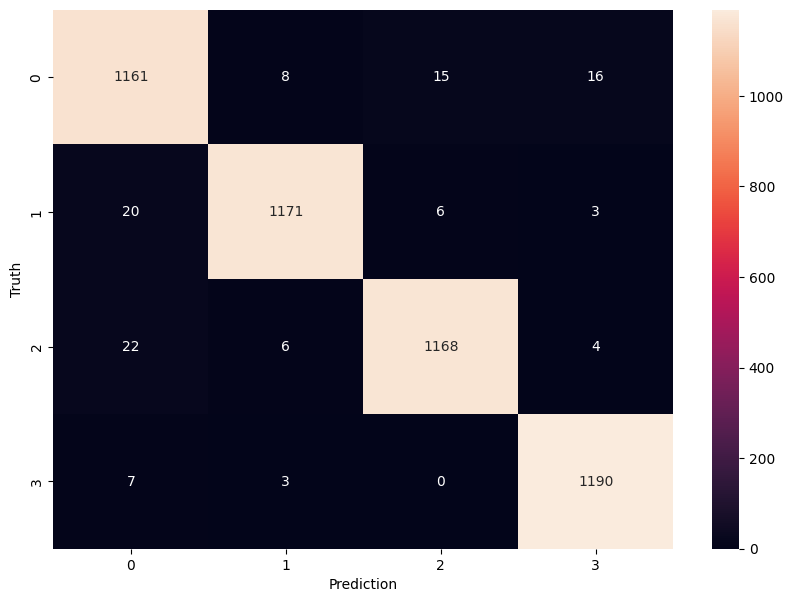

In [29]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')